<IPython.core.display.Javascript object>


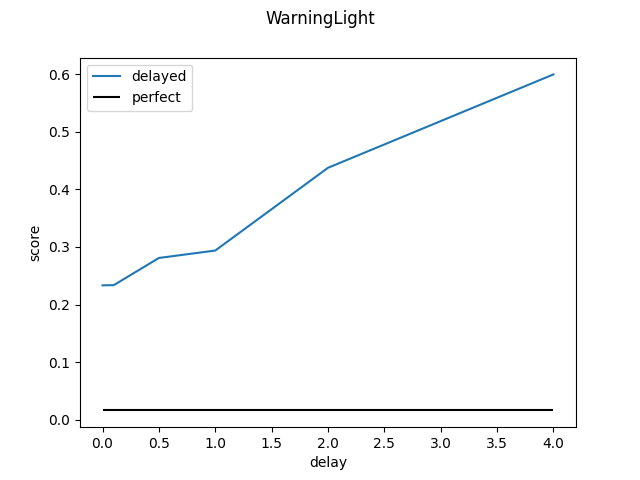

[(0.0, 0.2333), (0.1, 0.23369999999999996), (0.5, 0.2809), (1.0, 0.29379999999999995), (2.0, 0.43759999999999993), (4.0, 0.5998888888888889)]


<IPython.core.display.Javascript object>


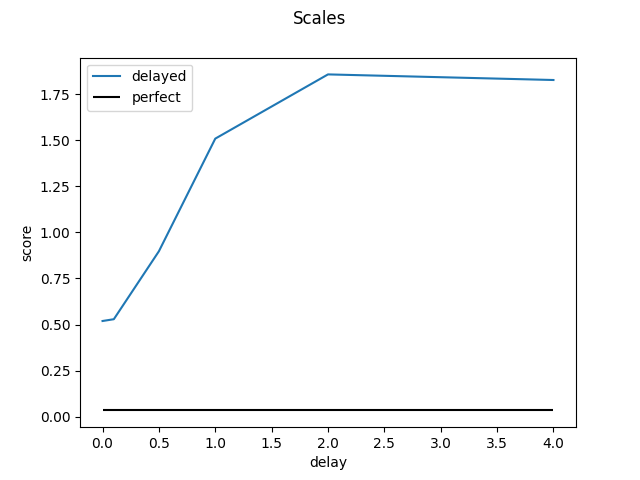

[(0.0, 0.5191000000000001), (0.1, 0.5288), (0.5, 0.8974), (1.0, 1.5081), (2.0, 1.8564), (4.0, 1.826)]


<IPython.core.display.Javascript object>


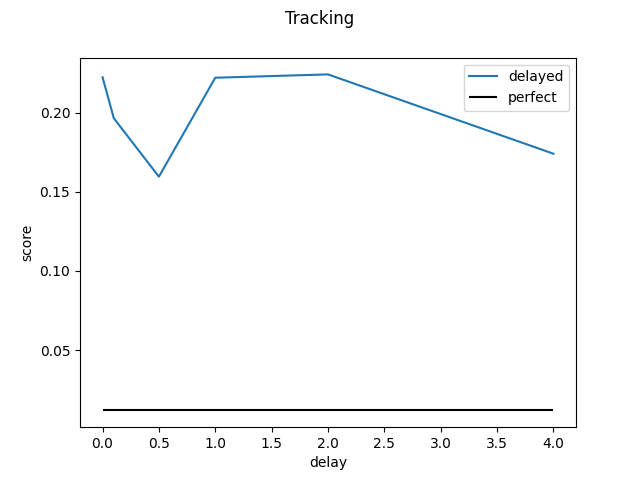

[(0.0, 0.2223), (0.1, 0.19640000000000002), (0.5, 0.15949999999999998), (1.0, 0.22199999999999998), (2.0, 0.22410000000000002), (4.0, 0.17400000000000002)]


<IPython.core.display.Javascript object>


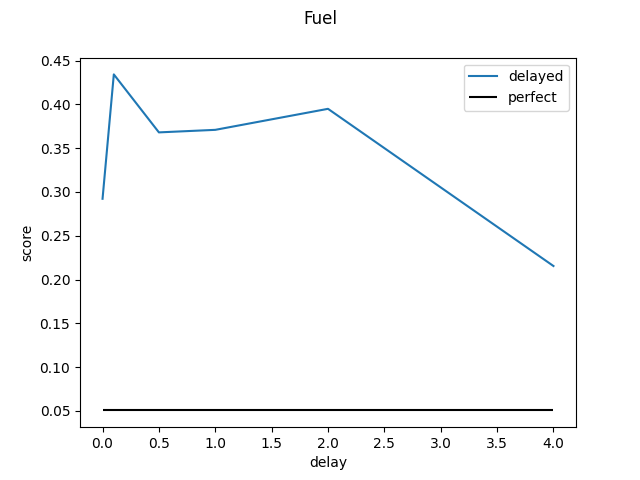

[(0.0, 0.2922), (0.1, 0.4342), (0.5, 0.368), (1.0, 0.3709), (2.0, 0.3948999999999999), (4.0, 0.21544444444444447)]


<IPython.core.display.Javascript object>


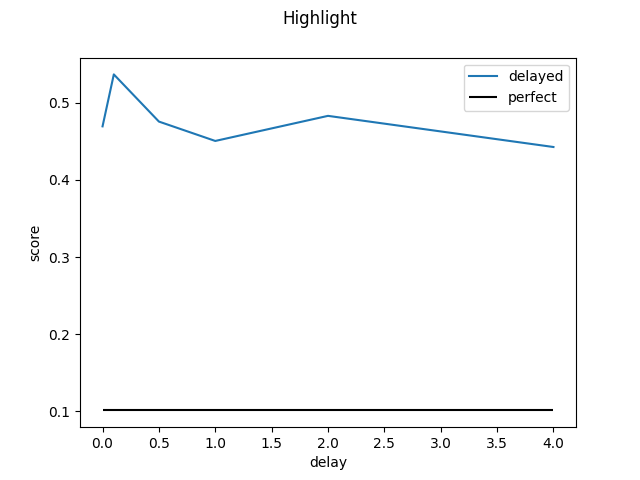

[(0.0, 0.46929999999999994), (0.1, 0.5366000000000001), (0.5, 0.4755), (1.0, 0.45039999999999997), (2.0, 0.4829), (4.0, 0.44255555555555554)]


In [89]:
import matplotlib.pyplot as plt
import numpy
from pprint import pprint

%matplotlib notebook

def avg(array, name):
    def extract(run):
        #print(run)
        return float([l.split(":")[1].strip().split(" ")[0] for l in run if name in l][0])
    values = [extract(run) for run in array]
    return sum(values) / len(values)

def result(array):
    names = ["WarningLight", "Scales", "Tracking", "Fuel", "Highlight"]
    return {n:avg(array, n) for n in names}

with open("experiment1/results.txt", "r") as f:
    perfect = f.read()
    
perfect = perfect.split("#")
perfect = [a.split("\n") for a in perfect if a != '']
perfect = result(perfect)

#print("PERFECT USER")
#pprint(perfect)

with open("experiment2/results_final.txt", "r") as f:
    delay = f.read()
    delay = delay.split("DELAY")[1:]
    delay_result = {}
    for d in delay:
        dr = d.split("#")
        dv = float(dr[0].strip())
        dr = [a.split("\n") for a in dr[1:] if a != ''][:-1]
        dr = result(dr)
  
        delay_result[dv] = dr

#print(delay_result)

    #print(delay)
    
    
names = ["WarningLight", "Scales", "Tracking", "Fuel", "Highlight"]

for n in names:
    fig = plt.figure()
    fig.suptitle(n)
    
    dx = list(delay_result.keys())
    dy = [d[n] for d in delay_result.values()]
    plt.plot(dx, dy, label="delayed")
    print([(k,v[n]) for k,v in delay_result.items()])
    
    plt.hlines(perfect[n], 0, 4, label="perfect")
    plt.legend()
    plt.xlabel("delay")
    plt.ylabel("score")
    plt.savefig(n + ".png")
    
    